In [1]:
import importlib
import sys
import pickle
import numpy as np

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')


In [2]:
import src.evaluation_metrics.conduct_evaluation
importlib.reload(src.evaluation_metrics.conduct_evaluation)

import src.evaluation_metrics.metrics
importlib.reload(src.evaluation_metrics.metrics)

<module 'src.evaluation_metrics.metrics' from '/home/LordKunkler/probabilistic_suffix_prediction_lab/probabilistic_suffix_prediction_dev/src/notebooks/evaluation_metric_notebooks/eval_normal_4layer/BPIC17/../../../../../src/evaluation_metrics/metrics.py'>

In [3]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

output_dirs = ['../../../../../../../data/BPIC17/gn_l4/']

all_results = dict()

for output_dir in output_dirs:
    evaluation_metrics = {
        #'RemainingTime_MSE_seconds' : src.evaluation_metrics.metrics.LastValueMeanMSE('case_elapsed_time'),
        #'RemainingTime_MAE_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanMedianVarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_CRPS_seconds' : src.evaluation_metrics.metrics.LastValueCRPS('case_elapsed_time'),
        #'Levenshtein_CRPS_activity' : src.evaluation_metrics.metrics.LevenshteinCRPS('concept:name'),
        'LevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.LevenshteinMeanVar('concept:name', percentile=0.25),
        #'Raw_activity' : src.evaluation_metrics.metrics.RawAttribute('Activity'),
        #'LevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.LevenshteinMeanVar('concept:name', percentile=0.16),
        #'LevenshteinMeanVar_resource' : src.evaluation_metrics.metrics.LevenshteinMeanVar('org:resource', percentile=0.16),

        'SumValuesInterval_50' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.5),
        'SumValuesInterval_75' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.75),
        # 'SumValuesInterval_90' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.90),
        'SumValuesInterval_95' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.95),
        # 'SumValuesInterval_99' : src.evaluation_metrics.metrics.SumValuesInterval('event_elapsed_time', percentile=0.99),

        'LastValueInterval_50' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.50),
        'LastValueInterval_75' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.75),
        # 'LastValueInterval_90' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.90),
        'LastValueInterval_95' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.95),
        # 'LastValueInterval_99' : src.evaluation_metrics.metrics.LastValueInterval('case_elapsed_time', percentile=0.99),

        'SuffixCountInterval_50' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.50),
        'SuffixCountInterval_75' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.75),
        # 'SuffixCountInterval_90' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.90),
        'SuffixCountInterval_95' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.95),
        # 'SuffixCountInterval_99' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.99),

        #'NormalizedDamerauLevenshteinCRPS_activity' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceCRPS('concept:name'),
        'NormalizedDamerauLevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceMeanVar('concept:name', percentile=0.25),

        #'NormalizedDamerauLevenshteinMeanVar_resource' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceMedianVar('Activity', percentile=0.16),
        #'RemainingTime_PIT' : src.evaluation_metrics.metrics.LastValuePIT('case_elapsed_time'),
        #'EventElapsed_PIT' : src.evaluation_metrics.metrics.LastValuePIT('event_elapsed_time'),


        #'RemainingTime_MAE_Median_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedianVarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Median2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedian2VarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Mean_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Mean2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16),

        #'RemainingTime_MSE_Median_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedianVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Median2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedian2VarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16),


        #'RemainingTime_SUM_Mean_MSE_outliers' : src.evaluation_metrics.metrics.SumValueMeanMSE('event_elapsed_time', percentile=0.16),
        'RemainingTime_SUM_Mean_MAE_outliers' : src.evaluation_metrics.metrics.SumValueMeanMAE('event_elapsed_time', percentile=0.25, value_factor = 3600*24),
        'RemainingTime_SUM_Abs_Mean_MAE_outliers' : src.evaluation_metrics.metrics.SumAbsValueMeanMAE('event_elapsed_time', percentile=0.25, value_factor = 3600*24),

        #'RemainingTime_SUM_Mean_MSE_2' : src.evaluation_metrics.metrics.SumValueMeanMSE('event_elapsed_time', percentile=0.16, outlier_removal=2),
        #'RemainingTime_SUM_Mean_MAE_2' : src.evaluation_metrics.metrics.SumValueMeanMAE('event_elapsed_time', percentile=0.16, outlier_removal=2),

        'RemainingTime_LastEvent_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.25, value_factor=3600*24),

        #'RemainingTime_MAE_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MAE_Mean2_Var_seconds_3.5' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16, outlier_removal=3.5),
        #'RemainingTime_MAE_Mean2_Var_seconds_2.5' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16, outlier_removal=2.5),
        #'RemainingTime_MAE_Mean2_Var_seconds_2' : src.evaluation_metrics.metrics.LastValueMean2VarMAE('case_elapsed_time', percentile=0.16, outlier_removal=2),


        #'RemainingTime_MSE_Median_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedianVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Median2_Var_seconds' : src.evaluation_metrics.metrics.LastValueMedian2VarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean_Var_seconds' : src.evaluation_metrics.metrics.LastValueMeanVarMSE('case_elapsed_time', percentile=0.16),
        #'RemainingTime_MSE_Mean2_Var_seconds_3.5' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16, outlier_removal=3.5),
        #'RemainingTime_MSE_Mean2_Var_seconds_2.5' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16, outlier_removal=2.5),
        #'RemainingTime_MSE_Mean2_Var_seconds_2' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16, outlier_removal=2),
        #'RemainingTime_MSE_Mean2_Var_seconds_outliers' : src.evaluation_metrics.metrics.LastValueMean2VarMSE('case_elapsed_time', percentile=0.16),

        'RemainingTime_PIT' : src.evaluation_metrics.metrics.LastValuePIT('case_elapsed_time'),
        'EventElapsed_PIT' : src.evaluation_metrics.metrics.SumValuesPIT('event_elapsed_time'),
        'SuffixCount' : src.evaluation_metrics.metrics.SuffixCount(),
        'SuffixCountMAE' : src.evaluation_metrics.metrics.SuffixCountMAE(percentile=0.25)
    }

    res_raw, c = src.evaluation_metrics.conduct_evaluation.batch_evaluate(output_dir, evaluation_metrics, num_workers=2)
    # res_raw, c = src.evaluation_metrics.conduct_evaluation.evaluate_sequentially(output_dir, evaluation_metrics)
    all_results[output_dir] = (res_raw, c)

with open("BPIC17_eval.pkl", "wb") as file:
    pickle.dump(all_results, file)

Loaded: cont_results_part_00100.pkl

Loaded: cont_results_part_00050.pkl

Loaded: cont_results_part_00150.pkl

Loaded: cont_results_part_00200.pkl

Loaded: cont_results_part_00300.pkl

Loaded: cont_results_part_00250.pkl

Loaded: cont_results_part_00400.pkl

Loaded: cont_results_part_00350.pkl

Loaded: cont_results_part_00450.pkl

Loaded: cont_results_part_00500.pkl

Loaded: cont_results_part_00550.pkl

Loaded: cont_results_part_00600.pkl

Loaded: cont_results_part_00650.pkl

Loaded: cont_results_part_00700.pkl

Loaded: cont_results_part_00800.pkl

Loaded: cont_results_part_00750.pkl

Loaded: cont_results_part_00850.pkl

Loaded: cont_results_part_00900.pkl

Loaded: cont_results_part_00950.pkl

Loaded: cont_results_part_01000.pkl

Loaded: cont_results_part_01050.pkl

Loaded: cont_results_part_01100.pkl

Loaded: cont_results_part_01150.pkl

Loaded: cont_results_part_01200.pkl

Loaded: cont_results_part_01250.pkl

Loaded: cont_results_part_01300.pkl

Loaded: cont_results_part_01350.pkl

Loaded: cont_results_part_01400.pkl

Loaded: cont_results_part_01450.pkl

Loaded: cont_results_part_01500.pkl

Loaded: cont_results_part_01550.pkl

Loaded: cont_results_part_01650.pkl

Loaded: cont_results_part_01600.pkl

Loaded: cont_results_part_01750.pkl

Loaded: cont_results_part_01700.pkl

Loaded: cont_results_part_01800.pkl

Loaded: cont_results_part_01850.pkl

Loaded: cont_results_part_01900.pkl

Loaded: cont_results_part_01950.pkl

Loaded: cont_results_part_02000.pkl

Loaded: cont_results_part_02050.pkl

Loaded: cont_results_part_02100.pkl

Loaded: cont_results_part_02150.pkl

Loaded: cont_results_part_02200.pkl

Loaded: cont_results_part_02250.pkl

Loaded: cont_results_part_02300.pkl

Loaded: cont_results_part_02350.pkl

Loaded: cont_results_part_02400.pkl

Loaded: cont_results_part_02450.pkl

Loaded: cont_results_part_02500.pkl

Loaded: cont_results_part_02550.pkl

Loaded: cont_results_part_02600.pkl

Loaded: cont_results_part_02650.pkl

Loaded: cont_results_part_02700.pkl

Loaded: cont_results_part_02750.pkl

Loaded: cont_results_part_02800.pkl

Loaded: cont_results_part_02850.pkl

Loaded: cont_results_part_02900.pkl

Loaded: cont_results_part_02950.pkl

Loaded: cont_results_part_03000.pkl

Loaded: cont_results_part_03050.pkl

Loaded: cont_results_part_03100.pkl

Loaded: cont_results_part_03150.pkl

Loaded: cont_results_part_03200.pkl

Loaded: cont_results_part_03250.pkl

Loaded: cont_results_part_03300.pkl

Loaded: cont_results_part_03350.pkl

Loaded: cont_results_part_03400.pkl

Loaded: cont_results_part_03450.pkl

Loaded: cont_results_part_03500.pkl

Loaded: cont_results_part_03550.pkl

Loaded: cont_results_part_03600.pkl

Loaded: cont_results_part_03650.pkl

Loaded: cont_results_part_03700.pkl

Loaded: cont_results_part_03750.pkl

Loaded: cont_results_part_03800.pkl

Loaded: cont_results_part_03850.pkl

Loaded: cont_results_part_03900.pkl

Loaded: cont_results_part_03950.pkl

Loaded: cont_results_part_04000.pkl

Loaded: cont_results_part_04050.pkl

Loaded: cont_results_part_04100.pkl

Loaded: cont_results_part_04150.pkl

Loaded: cont_results_part_04200.pkl

Loaded: cont_results_part_04250.pkl

Loaded: cont_results_part_04350.pkl

Loaded: cont_results_part_04300.pkl

Loaded: cont_results_part_04400.pkl

Loaded: cont_results_part_04450.pkl

Loaded: cont_results_part_04500.pkl

Loaded: cont_results_part_04550.pkl

Loaded: cont_results_part_04650.pkl

Loaded: cont_results_part_04600.pkl

Loaded: cont_results_part_04750.pkl

Loaded: cont_results_part_04700.pkl

Loaded: cont_results_part_04800.pkl

Loaded: cont_results_part_04850.pkl

Loaded: cont_results_part_04900.pkl

Loaded: cont_results_part_04950.pkl

Loaded: cont_results_part_05000.pkl

Loaded: cont_results_part_05050.pkl

Loaded: cont_results_part_05100.pkl

Loaded: cont_results_part_05150.pkl

Loaded: cont_results_part_05200.pkl

Loaded: cont_results_part_05250.pkl

Loaded: cont_results_part_05300.pkl

Loaded: cont_results_part_05350.pkl

Loaded: cont_results_part_05450.pkl

Loaded: cont_results_part_05400.pkl

Loaded: cont_results_part_05550.pkl

Loaded: cont_results_part_05500.pkl

Loaded: cont_results_part_05600.pkl

Loaded: cont_results_part_05650.pkl

Loaded: cont_results_part_05700.pkl

Loaded: cont_results_part_05750.pkl

Loaded: cont_results_part_05800.pkl

Loaded: cont_results_part_05850.pkl

Loaded: cont_results_part_05900.pkl

Loaded: cont_results_part_05950.pkl

Loaded: cont_results_part_06000.pkl

Loaded: cont_results_part_06050.pkl

Loaded: cont_results_part_06100.pkl

Loaded: cont_results_part_06150.pkl

Loaded: cont_results_part_06200.pkl

Loaded: cont_results_part_06250.pkl

Loaded: cont_results_part_06300.pkl

Loaded: cont_results_part_06350.pkl

Loaded: cont_results_part_06400.pkl

Loaded: cont_results_part_06450.pkl

Loaded: cont_results_part_06500.pkl

Loaded: cont_results_part_06600.pkl

Loaded: cont_results_part_06550.pkl

Loaded: cont_results_part_06650.pkl

Loaded: cont_results_part_06700.pkl

Loaded: cont_results_part_06750.pkl

Loaded: cont_results_part_06800.pkl

Loaded: cont_results_part_06850.pkl

Loaded: cont_results_part_06900.pkl

Loaded: cont_results_part_06950.pkl

Loaded: cont_results_part_07000.pkl

Loaded: cont_results_part_07050.pkl

Loaded: cont_results_part_07100.pkl

Loaded: cont_results_part_07150.pkl

Loaded: cont_results_part_07200.pkl

Loaded: cont_results_part_07250.pkl

Loaded: cont_results_part_07300.pkl

Loaded: cont_results_part_07350.pkl

Loaded: cont_results_part_07400.pkl

Loaded: cont_results_part_07450.pkl

Loaded: cont_results_part_07500.pkl

Loaded: cont_results_part_07550.pkl

Loaded: cont_results_part_07600.pkl

Loaded: cont_results_part_07650.pkl

Loaded: cont_results_part_07700.pkl

Loaded: cont_results_part_07750.pkl

Loaded: cont_results_part_07800.pkl

Loaded: cont_results_part_07850.pkl

Loaded: cont_results_part_07900.pkl

Loaded: cont_results_part_07950.pkl

Loaded: cont_results_part_08000.pkl

Loaded: cont_results_part_08050.pkl

Loaded: cont_results_part_08100.pkl

Loaded: cont_results_part_08150.pkl

Loaded: cont_results_part_08200.pkl

Loaded: cont_results_part_08250.pkl

Loaded: cont_results_part_08300.pkl

Loaded: cont_results_part_08350.pkl

Loaded: cont_results_part_08400.pkl

Loaded: cont_results_part_08450.pkl

Loaded: cont_results_part_08500.pkl

Loaded: cont_results_part_08550.pkl

Loaded: cont_results_part_08600.pkl

Loaded: cont_results_part_08650.pkl

Loaded: cont_results_part_08700.pkl

Loaded: cont_results_part_08750.pkl

Loaded: cont_results_part_08800.pkl

Loaded: cont_results_part_08850.pkl

Loaded: cont_results_part_08900.pkl

Loaded: cont_results_part_08950.pkl

Loaded: cont_results_part_09000.pkl

Loaded: cont_results_part_09050.pkl

Loaded: cont_results_part_09100.pkl

Loaded: cont_results_part_09150.pkl

Loaded: cont_results_part_09200.pkl

Loaded: cont_results_part_09250.pkl

Loaded: cont_results_part_09300.pkl

Loaded: cont_results_part_09350.pkl

Loaded: cont_results_part_09400.pkl

Loaded: cont_results_part_09450.pkl

Loaded: cont_results_part_09500.pkl

Loaded: cont_results_part_09550.pkl

Loaded: cont_results_part_09650.pkl

Loaded: cont_results_part_09600.pkl

Loaded: cont_results_part_09750.pkl

Loaded: cont_results_part_09700.pkl

Loaded: cont_results_part_09800.pkl

Loaded: cont_results_part_09850.pkl

Loaded: cont_results_part_09950.pkl

Loaded: cont_results_part_09900.pkl

Loaded: cont_results_part_10050.pkl

Loaded: cont_results_part_10000.pkl

Loaded: cont_results_part_10100.pkl

Loaded: cont_results_part_10150.pkl

Loaded: cont_results_part_10250.pkl

Loaded: cont_results_part_10200.pkl

Loaded: cont_results_part_10300.pkl

Loaded: cont_results_part_10350.pkl

Loaded: cont_results_part_10450.pkl

Loaded: cont_results_part_10400.pkl

Loaded: cont_results_part_10500.pkl

Loaded: cont_results_part_10550.pkl

Loaded: cont_results_part_10600.pkl

Loaded: cont_results_part_10650.pkl

Loaded: cont_results_part_10700.pkl

Loaded: cont_results_part_10750.pkl

Loaded: cont_results_part_10800.pkl

Loaded: cont_results_part_10850.pkl

Loaded: cont_results_part_10900.pkl

Loaded: cont_results_part_10950.pkl

Loaded: cont_results_part_11000.pkl

Loaded: cont_results_part_11050.pkl

Loaded: cont_results_part_11100.pkl

Loaded: cont_results_part_11150.pkl

Loaded: cont_results_part_11200.pkl

Loaded: cont_results_part_11250.pkl

Loaded: cont_results_part_11300.pkl

Loaded: cont_results_part_11350.pkl

Loaded: cont_results_part_11400.pkl

Loaded: cont_results_part_11450.pkl

Loaded: cont_results_part_11500.pkl

Loaded: cont_results_part_11550.pkl

Loaded: cont_results_part_11600.pkl

Loaded: cont_results_part_11650.pkl

Loaded: cont_results_part_11750.pkl

Loaded: cont_results_part_11700.pkl

Loaded: cont_results_part_11850.pkl

Loaded: cont_results_part_11800.pkl

Loaded: cont_results_part_11900.pkl

Loaded: cont_results_part_11950.pkl

Loaded: cont_results_part_12050.pkl

Loaded: cont_results_part_12000.pkl

Loaded: cont_results_part_12100.pkl

Loaded: cont_results_part_12150.pkl

Loaded: cont_results_part_12200.pkl

Loaded: cont_results_part_12250.pkl

Loaded: cont_results_part_12300.pkl

Loaded: cont_results_part_12350.pkl

Loaded: cont_results_part_12400.pkl

Loaded: cont_results_part_12450.pkl

Loaded: cont_results_part_12500.pkl

Loaded: cont_results_part_12550.pkl

Loaded: cont_results_part_12600.pkl

Loaded: cont_results_part_12650.pkl

Loaded: cont_results_part_12700.pkl

Loaded: cont_results_part_12750.pkl

Loaded: cont_results_part_12800.pkl

Loaded: cont_results_part_12850.pkl

Loaded: cont_results_part_12900.pkl

Loaded: cont_results_part_12950.pkl

Loaded: cont_results_part_13000.pkl

Loaded: cont_results_part_13050.pkl

Loaded: cont_results_part_13100.pkl

Loaded: cont_results_part_13150.pkl

Loaded: cont_results_part_13200.pkl

Loaded: cont_results_part_13250.pkl

Loaded: cont_results_part_13300.pkl

Loaded: cont_results_part_13350.pkl

Loaded: cont_results_part_13400.pkl

Loaded: cont_results_part_13450.pkl

Loaded: cont_results_part_13500.pkl

Loaded: cont_results_part_13550.pkl

Loaded: cont_results_part_13600.pkl

Loaded: cont_results_part_13700.pkl

Loaded: cont_results_part_13650.pkl

Loaded: cont_results_part_13750.pkl

Loaded: cont_results_part_13800.pkl

Loaded: cont_results_part_13850.pkl

Loaded: cont_results_part_13900.pkl

Loaded: cont_results_part_13950.pkl

Loaded: cont_results_part_14000.pkl

Loaded: cont_results_part_14050.pkl

Loaded: cont_results_part_14100.pkl

Loaded: cont_results_part_14150.pkl

Loaded: cont_results_part_14200.pkl

Loaded: cont_results_part_14250.pkl

Loaded: cont_results_part_14300.pkl

Loaded: cont_results_part_14350.pkl

Loaded: cont_results_part_14400.pkl

Loaded: cont_results_part_14500.pkl

Loaded: cont_results_part_14450.pkl

Loaded: cont_results_part_14600.pkl

Loaded: cont_results_part_14550.pkl

Loaded: cont_results_part_14650.pkl

Loaded: cont_results_part_14700.pkl

Loaded: cont_results_part_14750.pkl

Loaded: cont_results_part_14800.pkl

Loaded: cont_results_part_14850.pkl

Loaded: cont_results_part_14900.pkl

Loaded: cont_results_part_14950.pkl

Loaded: cont_results_part_15000.pkl

Loaded: cont_results_part_15050.pkl

Loaded: cont_results_part_15100.pkl

Loaded: cont_results_part_15150.pkl

Loaded: cont_results_part_15200.pkl

Loaded: cont_results_part_15300.pkl

Loaded: cont_results_part_15250.pkl

Loaded: cont_results_part_15400.pkl

Loaded: cont_results_part_15350.pkl

Loaded: cont_results_part_15450.pkl

Loaded: cont_results_part_15500.pkl

Loaded: cont_results_part_15550.pkl

Loaded: cont_results_part_15600.pkl

Loaded: cont_results_part_15650.pkl

Loaded: cont_results_part_15700.pkl

Loaded: cont_results_part_15750.pkl

Loaded: cont_results_part_15800.pkl

Loaded: cont_results_part_15850.pkl

Loaded: cont_results_part_15900.pkl

Loaded: cont_results_part_15950.pkl

Loaded: cont_results_part_16000.pkl

Loaded: cont_results_part_16050.pkl

Loaded: cont_results_part_16100.pkl

Loaded: cont_results_part_16150.pkl

Loaded: cont_results_part_16200.pkl

Loaded: cont_results_part_16250.pkl

Loaded: cont_results_part_16300.pkl

Loaded: cont_results_part_16350.pkl

Loaded: cont_results_part_16400.pkl

Loaded: cont_results_part_16450.pkl

Loaded: cont_results_part_16500.pkl

Loaded: cont_results_part_16550.pkl

Loaded: cont_results_part_16600.pkl

Loaded: cont_results_part_16650.pkl

Loaded: cont_results_part_16700.pkl

Loaded: cont_results_part_16750.pkl

Loaded: cont_results_part_16800.pkl

Loaded: cont_results_part_16850.pkl

Loaded: cont_results_part_16900.pkl

Loaded: cont_results_part_16950.pkl

Loaded: cont_results_part_17000.pkl

Loaded: cont_results_part_17050.pkl

Loaded: cont_results_part_17100.pkl

Loaded: cont_results_part_17150.pkl

Loaded: cont_results_part_17200.pkl

Loaded: cont_results_part_17250.pkl

Loaded: cont_results_part_17300.pkl

Loaded: cont_results_part_17350.pkl

Loaded: cont_results_part_17400.pkl

Loaded: cont_results_part_17450.pkl

Loaded: cont_results_part_17500.pkl

Loaded: cont_results_part_17550.pkl

Loaded: cont_results_part_17600.pkl

Loaded: cont_results_part_17650.pkl

Loaded: cont_results_part_17700.pkl

Loaded: cont_results_part_17750.pkl

Loaded: cont_results_part_17800.pkl

Loaded: cont_results_part_17850.pkl

Loaded: cont_results_part_17900.pkl

Loaded: cont_results_part_17950.pkl

Loaded: cont_results_part_18000.pkl

Loaded: cont_results_part_18050.pkl

Loaded: cont_results_part_18100.pkl

Loaded: cont_results_part_18150.pkl

Loaded: cont_results_part_18200.pkl

Loaded: cont_results_part_18250.pkl

Loaded: cont_results_part_18300.pkl

Loaded: cont_results_part_18350.pkl

Loaded: cont_results_part_18400.pkl

Loaded: cont_results_part_18450.pkl

Loaded: cont_results_part_18500.pkl

Loaded: cont_results_part_18550.pkl

Loaded: cont_results_part_18600.pkl

Loaded: cont_results_part_18650.pkl

Loaded: cont_results_part_18700.pkl

Loaded: cont_results_part_18750.pkl

Loaded: cont_results_part_18800.pkl

Loaded: cont_results_part_18850.pkl

Loaded: cont_results_part_18900.pkl

Loaded: cont_results_part_19000.pkl

Loaded: cont_results_part_18950.pkl

Loaded: cont_results_part_19050.pkl

Loaded: cont_results_part_19100.pkl

Loaded: cont_results_part_19150.pkl

Loaded: cont_results_part_19200.pkl

Loaded: cont_results_part_19250.pkl

Loaded: cont_results_part_19300.pkl

Loaded: cont_results_part_19350.pkl

Loaded: cont_results_part_19400.pkl

Loaded: cont_results_part_19450.pkl

Loaded: cont_results_part_19500.pkl

Loaded: cont_results_part_19550.pkl

Loaded: cont_results_part_19600.pkl

Loaded: cont_results_part_19650.pkl

Loaded: cont_results_part_19700.pkl

Loaded: cont_results_part_19750.pkl

Loaded: cont_results_part_19800.pkl

Loaded: cont_results_part_19850.pkl

Loaded: cont_results_part_19900.pkl

Loaded: cont_results_part_19950.pkl

Loaded: cont_results_part_20000.pkl

Loaded: cont_results_part_20050.pkl

Loaded: cont_results_part_20100.pkl

Loaded: cont_results_part_20150.pkl

Loaded: cont_results_part_20200.pkl

Loaded: cont_results_part_20250.pkl

Loaded: cont_results_part_20300.pkl

Loaded: cont_results_part_20350.pkl

Loaded: cont_results_part_20400.pkl

Loaded: cont_results_part_20450.pkl

Loaded: cont_results_part_20500.pkl

Loaded: cont_results_part_20550.pkl

Loaded: cont_results_part_20600.pkl

Loaded: cont_results_part_20650.pkl

Loaded: cont_results_part_20700.pkl

Loaded: cont_results_part_20750.pkl

Loaded: cont_results_part_20800.pkl

Loaded: cont_results_part_20850.pkl

Loaded: cont_results_part_20900.pkl

Loaded: cont_results_part_20950.pkl

Loaded: cont_results_part_21000.pkl

Loaded: cont_results_part_21050.pkl

Loaded: cont_results_part_21100.pkl

Loaded: cont_results_part_21150.pkl

Loaded: cont_results_part_21200.pkl

Loaded: cont_results_part_21250.pkl

Loaded: cont_results_part_21300.pkl

Loaded: cont_results_part_21350.pkl

Loaded: cont_results_part_21400.pkl

Loaded: cont_results_part_21450.pkl

Loaded: cont_results_part_21500.pkl

Loaded: cont_results_part_21550.pkl

Loaded: cont_results_part_21600.pkl

Loaded: cont_results_part_21700.pkl

Loaded: cont_results_part_21650.pkl

Loaded: cont_results_part_21750.pkl

Loaded: cont_results_part_21800.pkl

Loaded: cont_results_part_21850.pkl

Loaded: cont_results_part_21900.pkl

Loaded: cont_results_part_21950.pkl

Loaded: cont_results_part_22000.pkl

Loaded: cont_results_part_22050.pkl

Loaded: cont_results_part_22100.pkl

Loaded: cont_results_part_22150.pkl

Loaded: cont_results_part_22200.pkl

Loaded: cont_results_part_22250.pkl

Loaded: cont_results_part_22300.pkl

Loaded: cont_results_part_22350.pkl

Loaded: cont_results_part_22400.pkl

Loaded: cont_results_part_22450.pkl

Loaded: cont_results_part_22500.pkl

Loaded: cont_results_part_22550.pkl

Loaded: cont_results_part_22600.pkl

Loaded: cont_results_part_22650.pkl

Loaded: cont_results_part_22700.pkl

Loaded: cont_results_part_22750.pkl

Loaded: cont_results_part_22800.pkl

Loaded: cont_results_part_22850.pkl

Loaded: cont_results_part_22900.pkl

Loaded: cont_results_part_22950.pkl

Loaded: cont_results_part_23000.pkl

Loaded: cont_results_part_23050.pkl

Loaded: cont_results_part_23100.pkl

Loaded: cont_results_part_23150.pkl

Loaded: cont_results_part_23200.pkl

Loaded: cont_results_part_23250.pkl

Loaded: cont_results_part_23300.pkl

Loaded: cont_results_part_23350.pkl

Loaded: cont_results_part_23400.pkl

Loaded: cont_results_part_23450.pkl

Loaded: cont_results_part_23500.pkl

Loaded: cont_results_part_23550.pkl

Loaded: cont_results_part_23600.pkl

Loaded: cont_results_part_23650.pkl

Loaded: cont_results_part_23700.pkl

Loaded: cont_results_part_23750.pkl

Loaded: cont_results_part_23800.pkl

Loaded: cont_results_part_23850.pkl

Loaded: cont_results_part_23900.pkl

Loaded: cont_results_part_23950.pkl

Loaded: cont_results_part_24000.pkl

Loaded: cont_results_part_24050.pkl

Loaded: cont_results_part_24100.pkl

Loaded: cont_results_part_24150.pkl

Loaded: cont_results_part_24200.pkl

Loaded: cont_results_part_24250.pkl

Loaded: cont_results_part_24300.pkl

Loaded: cont_results_part_24350.pkl

Loaded: cont_results_part_24400.pkl

Loaded: cont_results_part_24450.pkl

Loaded: cont_results_part_24500.pkl

Loaded: cont_results_part_24550.pkl

Loaded: cont_results_part_24600.pkl

Loaded: cont_results_part_24650.pkl

Loaded: cont_results_part_24700.pkl

Loaded: cont_results_part_24750.pkl

Loaded: cont_results_part_24800.pkl

Loaded: cont_results_part_24850.pkl

Loaded: cont_results_part_24900.pkl

Loaded: cont_results_part_24950.pkl

Loaded: cont_results_part_25000.pkl

Loaded: cont_results_part_25050.pkl

Loaded: cont_results_part_25100.pkl

Loaded: cont_results_part_25150.pkl

Loaded: cont_results_part_25200.pkl

Loaded: cont_results_part_25250.pkl

Loaded: cont_results_part_25300.pkl

Loaded: cont_results_part_25350.pkl

Loaded: cont_results_part_25400.pkl

Loaded: cont_results_part_25450.pkl

Loaded: cont_results_part_25500.pkl

Loaded: cont_results_part_25550.pkl

Loaded: cont_results_part_25600.pkl

Loaded: cont_results_part_25650.pkl

Loaded: cont_results_part_25700.pkl

Loaded: cont_results_part_25750.pkl

Loaded: cont_results_part_25800.pkl

Loaded: cont_results_part_25850.pkl

Loaded: cont_results_part_25900.pkl

Loaded: cont_results_part_25950.pkl

Loaded: cont_results_part_26000.pkl

Loaded: cont_results_part_26050.pkl

Loaded: cont_results_part_26100.pkl

Loaded: cont_results_part_26150.pkl

Loaded: cont_results_part_26200.pkl

Loaded: cont_results_part_26250.pkl

Loaded: cont_results_part_26300.pkl

Loaded: cont_results_part_26350.pkl

Loaded: cont_results_part_26400.pkl

Loaded: cont_results_part_26450.pkl

Loaded: cont_results_part_26500.pkl

Loaded: cont_results_part_26550.pkl

Loaded: cont_results_part_26600.pkl

Loaded: cont_results_part_26650.pkl

Loaded: cont_results_part_26700.pkl

Loaded: cont_results_part_26750.pkl

Loaded: cont_results_part_26800.pkl

Loaded: cont_results_part_26850.pkl

Loaded: cont_results_part_26900.pkl

Loaded: cont_results_part_26950.pkl

Loaded: cont_results_part_27000.pkl

Loaded: cont_results_part_27050.pkl

Loaded: cont_results_part_27100.pkl

Loaded: cont_results_part_27150.pkl

Loaded: cont_results_part_27200.pkl

Loaded: cont_results_part_27250.pkl

Loaded: cont_results_part_27300.pkl

Loaded: cont_results_part_27350.pkl

Loaded: cont_results_part_27400.pkl

Loaded: cont_results_part_27450.pkl

Loaded: cont_results_part_27500.pkl

Loaded: cont_results_part_27550.pkl

Loaded: cont_results_part_27600.pkl

Loaded: cont_results_part_27650.pkl

Loaded: cont_results_part_27700.pkl

Loaded: cont_results_part_27750.pkl

Loaded: cont_results_part_27800.pkl

Loaded: cont_results_part_27850.pkl

Loaded: cont_results_part_27900.pkl

Loaded: cont_results_part_28000.pkl

Loaded: cont_results_part_27950.pkl

Loaded: cont_results_part_28100.pkl

Loaded: cont_results_part_28050.pkl

Loaded: cont_results_part_28150.pkl

Loaded: cont_results_part_28200.pkl

Loaded: cont_results_part_28250.pkl

Loaded: cont_results_part_28300.pkl

Loaded: cont_results_part_28350.pkl

Loaded: cont_results_part_28400.pkl

Loaded: cont_results_part_28500.pkl

Loaded: cont_results_part_28450.pkl

Loaded: cont_results_part_28550.pkl

Loaded: cont_results_part_28600.pkl

Loaded: cont_results_part_28650.pkl

Loaded: cont_results_part_28700.pkl

Loaded: cont_results_part_28750.pkl

Loaded: cont_results_part_28800.pkl

Loaded: cont_results_part_28850.pkl

Loaded: cont_results_part_28900.pkl

Loaded: cont_results_part_28950.pkl

Loaded: cont_results_part_29000.pkl

Loaded: cont_results_part_29050.pkl

Loaded: cont_results_part_29100.pkl

Loaded: cont_results_part_29150.pkl

Loaded: cont_results_part_29200.pkl

Loaded: cont_results_part_29250.pkl

Loaded: cont_results_part_29300.pkl

Loaded: cont_results_part_29350.pkl

Loaded: cont_results_part_29400.pkl

Loaded: cont_results_part_29450.pkl

Loaded: cont_results_part_29500.pkl

Loaded: cont_results_part_29550.pkl

Loaded: cont_results_part_29600.pkl

Loaded: cont_results_part_29650.pkl

Loaded: cont_results_part_29700.pkl

Loaded: cont_results_part_29750.pkl

Loaded: cont_results_part_29800.pkl

Loaded: cont_results_part_29850.pkl

Loaded: cont_results_part_29900.pkl

Loaded: cont_results_part_29950.pkl

Loaded: cont_results_part_30000.pkl

Loaded: cont_results_part_30050.pkl

Loaded: cont_results_part_30100.pkl

Loaded: cont_results_part_30150.pkl

Loaded: cont_results_part_30200.pkl

Loaded: cont_results_part_30250.pkl

Loaded: cont_results_part_30300.pkl

Loaded: cont_results_part_30350.pkl

Loaded: cont_results_part_30400.pkl

Loaded: cont_results_part_30450.pkl

Loaded: cont_results_part_30500.pkl

Loaded: cont_results_part_30550.pkl

Loaded: cont_results_part_30600.pkl

Loaded: cont_results_part_30650.pkl

Loaded: cont_results_part_30700.pkl

Loaded: cont_results_part_30750.pkl

Loaded: cont_results_part_30800.pkl

Loaded: cont_results_part_30850.pkl

Loaded: cont_results_part_30900.pkl

Loaded: cont_results_part_30950.pkl

Loaded: cont_results_part_31000.pkl

Loaded: cont_results_part_31050.pkl

Loaded: cont_results_part_31100.pkl

Loaded: cont_results_part_31150.pkl

Loaded: cont_results_part_31200.pkl

Loaded: cont_results_part_31250.pkl

Loaded: cont_results_part_31350.pkl

Loaded: cont_results_part_31300.pkl

Loaded: cont_results_part_31450.pkl

Loaded: cont_results_part_31400.pkl

Loaded: cont_results_part_31500.pkl

Loaded: cont_results_part_31550.pkl

Loaded: cont_results_part_31600.pkl

Loaded: cont_results_part_31650.pkl

Loaded: cont_results_part_31700.pkl

Loaded: cont_results_part_31750.pkl

Loaded: cont_results_part_31800.pkl

Loaded: cont_results_part_31850.pkl

Loaded: cont_results_part_31900.pkl

Loaded: cont_results_part_31950.pkl

Loaded: cont_results_part_32000.pkl

Loaded: cont_results_part_32050.pkl

Loaded: cont_results_part_32100.pkl

Loaded: cont_results_part_32150.pkl

Loaded: cont_results_part_32200.pkl

Loaded: cont_results_part_32250.pkl

Loaded: cont_results_part_32300.pkl

Loaded: cont_results_part_32350.pkl

Loaded: cont_results_part_32400.pkl

Loaded: cont_results_part_32450.pkl

Loaded: cont_results_part_32500.pkl

Loaded: cont_results_part_32550.pkl

Loaded: cont_results_part_32600.pkl

Loaded: cont_results_part_32650.pkl

Loaded: cont_results_part_32700.pkl

Loaded: cont_results_part_32750.pkl

Loaded: cont_results_part_32800.pkl

Loaded: cont_results_part_32850.pkl

Loaded: cont_results_part_32900.pkl

Loaded: cont_results_part_32950.pkl

Loaded: cont_results_part_33000.pkl

Loaded: cont_results_part_33050.pkl

Loaded: cont_results_part_33100.pkl

Loaded: cont_results_part_33150.pkl

Loaded: cont_results_part_33200.pkl

Loaded: cont_results_part_33250.pkl

Loaded: cont_results_part_33300.pkl

Loaded: cont_results_part_33400.pkl

Loaded: cont_results_part_33350.pkl

Loaded: cont_results_part_33500.pkl

Loaded: cont_results_part_33450.pkl

Loaded: cont_results_part_33550.pkl

Loaded: cont_results_part_33600.pkl

Loaded: cont_results_part_33650.pkl

Loaded: cont_results_part_33700.pkl

Loaded: cont_results_part_33800.pkl

Loaded: cont_results_part_33750.pkl

Loaded: cont_results_part_33850.pkl

Loaded: cont_results_part_33900.pkl

Loaded: cont_results_part_33950.pkl

Loaded: cont_results_part_34000.pkl

Loaded: cont_results_part_34050.pkl

Loaded: cont_results_part_34100.pkl

Loaded: cont_results_part_34150.pkl

Loaded: cont_results_part_34200.pkl

Loaded: cont_results_part_34300.pkl

Loaded: cont_results_part_34250.pkl

Loaded: cont_results_part_34350.pkl

Loaded: cont_results_part_34400.pkl

Loaded: cont_results_part_34450.pkl

Loaded: cont_results_part_34500.pkl

Loaded: cont_results_part_34550.pkl

Loaded: cont_results_part_34600.pkl

Loaded: cont_results_part_34650.pkl

Loaded: cont_results_part_34700.pkl

Loaded: cont_results_part_34750.pkl

Loaded: cont_results_part_34800.pkl

Loaded: cont_results_part_34850.pkl

Loaded: cont_results_part_34900.pkl

Loaded: cont_results_part_34950.pkl

Loaded: cont_results_part_35000.pkl

Loaded: cont_results_part_35050.pkl

Loaded: cont_results_part_35100.pkl

Loaded: cont_results_part_35150.pkl

Loaded: cont_results_part_35200.pkl

Loaded: cont_results_part_35250.pkl

Loaded: cont_results_part_35300.pkl

Loaded: cont_results_part_35350.pkl

Loaded: cont_results_part_35400.pkl

Loaded: cont_results_part_35450.pkl

Loaded: cont_results_part_35500.pkl

Loaded: cont_results_part_35550.pkl

Loaded: cont_results_part_35600.pkl

Loaded: cont_results_part_35650.pkl

Loaded: cont_results_part_35700.pkl

Loaded: cont_results_part_35750.pkl

Loaded: cont_results_part_35800.pkl

Loaded: cont_results_part_35850.pkl

Loaded: cont_results_part_35900.pkl

Loaded: cont_results_part_35950.pkl

Loaded: cont_results_part_36000.pkl

Loaded: cont_results_part_36050.pkl

Loaded: cont_results_part_36100.pkl

Loaded: cont_results_part_36150.pkl

Loaded: cont_results_part_36200.pkl

Loaded: cont_results_part_36250.pkl

Loaded: cont_results_part_36300.pkl

Loaded: cont_results_part_36350.pkl

Loaded: cont_results_part_36400.pkl

Loaded: cont_results_part_36450.pkl

Loaded: cont_results_part_36500.pkl

Loaded: cont_results_part_36550.pkl

Loaded: cont_results_part_36600.pkl

Loaded: cont_results_part_36650.pkl

Loaded: cont_results_part_36700.pkl

Loaded: cont_results_part_36750.pkl

Loaded: cont_results_part_36800.pkl

Loaded: cont_results_part_36850.pkl

Loaded: cont_results_part_36900.pkl

Loaded: cont_results_part_36950.pkl

Loaded: cont_results_part_37000.pkl

Loaded: cont_results_part_37065.pkl

Loaded: cont_results_part_37050.pkl

Loaded: results_part_1000.pkl

Loaded: results_part_10000.pkl

Loaded: results_part_100000.pkl

Loaded: results_part_100500.pkl

Loaded: results_part_101000.pkl

Loaded: results_part_101500.pkl

Loaded: results_part_102000.pkl

Loaded: results_part_102500.pkl

Loaded: results_part_103000.pkl

Loaded: results_part_103500.pkl

Loaded: results_part_104000.pkl

Loaded: results_part_104500.pkl

Loaded: results_part_10500.pkl

Loaded: results_part_105000.pkl

Loaded: results_part_105500.pkl

Loaded: results_part_106000.pkl

Loaded: results_part_106500.pkl

Loaded: results_part_107000.pkl

Loaded: results_part_107500.pkl

Loaded: results_part_108000.pkl

Loaded: results_part_108500.pkl

Loaded: results_part_109000.pkl

Loaded: results_part_109500.pkl

Loaded: results_part_11000.pkl

Loaded: results_part_110000.pkl

Loaded: results_part_110500.pkl

Loaded: results_part_111000.pkl

Loaded: results_part_111500.pkl

Loaded: results_part_112000.pkl

Loaded: results_part_112500.pkl

Loaded: results_part_113000.pkl

Loaded: results_part_113500.pkl

Loaded: results_part_114500.pkl

Loaded: results_part_114000.pkl

Loaded: results_part_11500.pkl

Loaded: results_part_115000.pkl

Loaded: results_part_115500.pkl

Loaded: results_part_116000.pkl

Loaded: results_part_116500.pkl

Loaded: results_part_117000.pkl

Loaded: results_part_117500.pkl

Loaded: results_part_118000.pkl

Loaded: results_part_118500.pkl

Loaded: results_part_119000.pkl

Loaded: results_part_119500.pkl

Loaded: results_part_12000.pkl

Loaded: results_part_120000.pkl

Loaded: results_part_120500.pkl

Loaded: results_part_121000.pkl

Loaded: results_part_121500.pkl

Loaded: results_part_122000.pkl

Loaded: results_part_122500.pkl

Loaded: results_part_123000.pkl

Loaded: results_part_123500.pkl

Loaded: results_part_124000.pkl

Loaded: results_part_124500.pkl

Loaded: results_part_12500.pkl

Loaded: results_part_125000.pkl

Loaded: results_part_125500.pkl

Loaded: results_part_126000.pkl

Loaded: results_part_126500.pkl

Loaded: results_part_127000.pkl

Loaded: results_part_127500.pkl

Loaded: results_part_128000.pkl

Loaded: results_part_128500.pkl

Loaded: results_part_129000.pkl

Loaded: results_part_129500.pkl

Loaded: results_part_13000.pkl

Loaded: results_part_130000.pkl

Loaded: results_part_130500.pkl

Loaded: results_part_131000.pkl

Loaded: results_part_131500.pkl

Loaded: results_part_132000.pkl

Loaded: results_part_132500.pkl

Loaded: results_part_133000.pkl

Loaded: results_part_133500.pkl

Loaded: results_part_134000.pkl

Loaded: results_part_134500.pkl

Loaded: results_part_13500.pkl

Loaded: results_part_135000.pkl

Loaded: results_part_135500.pkl

Loaded: results_part_136000.pkl

Loaded: results_part_136500.pkl

Error: results_part_137500.pkl: pickle data was truncated

Loaded: results_part_137000.pkl

Loaded: results_part_14000.pkl

Loaded: results_part_14500.pkl

Loaded: results_part_1500.pkl

Loaded: results_part_15000.pkl

Loaded: results_part_15500.pkl

Loaded: results_part_16000.pkl

Loaded: results_part_16500.pkl

Loaded: results_part_17000.pkl

Loaded: results_part_17500.pkl

Loaded: results_part_18000.pkl

Loaded: results_part_18500.pkl

Loaded: results_part_19000.pkl

Loaded: results_part_19500.pkl

Loaded: results_part_2000.pkl

Loaded: results_part_20000.pkl

Loaded: results_part_20500.pkl

Loaded: results_part_21000.pkl

Loaded: results_part_21500.pkl

Loaded: results_part_22000.pkl

Loaded: results_part_22500.pkl

Loaded: results_part_23000.pkl

Loaded: results_part_23500.pkl

Loaded: results_part_24000.pkl

Loaded: results_part_24500.pkl

Loaded: results_part_2500.pkl

Loaded: results_part_25000.pkl

Loaded: results_part_25500.pkl

Loaded: results_part_26000.pkl

Loaded: results_part_26500.pkl

Loaded: results_part_27000.pkl

Loaded: results_part_27500.pkl

Loaded: results_part_28000.pkl

Loaded: results_part_28500.pkl

Loaded: results_part_29000.pkl

Loaded: results_part_29500.pkl

Loaded: results_part_3000.pkl

Loaded: results_part_30000.pkl

Loaded: results_part_30500.pkl

Loaded: results_part_31000.pkl

Loaded: results_part_31500.pkl

Loaded: results_part_32000.pkl

Loaded: results_part_32500.pkl

Loaded: results_part_33000.pkl

Loaded: results_part_33500.pkl

Loaded: results_part_34000.pkl

Loaded: results_part_34500.pkl

Loaded: results_part_3500.pkl

Loaded: results_part_35000.pkl

Loaded: results_part_35500.pkl

Loaded: results_part_36000.pkl

Loaded: results_part_36500.pkl

Loaded: results_part_37000.pkl

Loaded: results_part_37500.pkl

Loaded: results_part_38000.pkl

Loaded: results_part_38500.pkl

Loaded: results_part_39000.pkl

Loaded: results_part_39500.pkl

Loaded: results_part_4000.pkl

Loaded: results_part_40000.pkl

Loaded: results_part_40500.pkl

Loaded: results_part_41000.pkl

Loaded: results_part_41500.pkl

Loaded: results_part_42000.pkl

Loaded: results_part_42500.pkl

Loaded: results_part_43000.pkl

Loaded: results_part_43500.pkl

Loaded: results_part_44000.pkl

Loaded: results_part_44500.pkl

Loaded: results_part_4500.pkl

Loaded: results_part_45000.pkl

Loaded: results_part_45500.pkl

Loaded: results_part_46000.pkl

Loaded: results_part_46500.pkl

Loaded: results_part_47000.pkl

Loaded: results_part_47500.pkl

Loaded: results_part_48000.pkl

Loaded: results_part_48500.pkl

Loaded: results_part_49000.pkl

Loaded: results_part_49500.pkl

Loaded: results_part_500.pkl

Loaded: results_part_5000.pkl

Loaded: results_part_50000.pkl

Loaded: results_part_50500.pkl

Loaded: results_part_51000.pkl

Loaded: results_part_51500.pkl

Loaded: results_part_52000.pkl

Loaded: results_part_52500.pkl

Loaded: results_part_53000.pkl

Loaded: results_part_53500.pkl

Loaded: results_part_54000.pkl

Loaded: results_part_54500.pkl

Loaded: results_part_5500.pkl

Loaded: results_part_55000.pkl

Loaded: results_part_55500.pkl

Loaded: results_part_56000.pkl

Loaded: results_part_56500.pkl

Loaded: results_part_57000.pkl

Loaded: results_part_57500.pkl

Loaded: results_part_58000.pkl

Loaded: results_part_58500.pkl

Loaded: results_part_59000.pkl

Loaded: results_part_59500.pkl

Loaded: results_part_6000.pkl

Loaded: results_part_60000.pkl

Loaded: results_part_60500.pkl

Loaded: results_part_61000.pkl

Loaded: results_part_61500.pkl

Loaded: results_part_62000.pkl

Loaded: results_part_62500.pkl

Loaded: results_part_63000.pkl

Loaded: results_part_63500.pkl

Loaded: results_part_64000.pkl

Loaded: results_part_64500.pkl

Loaded: results_part_6500.pkl

Loaded: results_part_65000.pkl

Loaded: results_part_65500.pkl

Loaded: results_part_66000.pkl

Loaded: results_part_66500.pkl

Loaded: results_part_67000.pkl

Loaded: results_part_67500.pkl

Loaded: results_part_68000.pkl

Loaded: results_part_68500.pkl

Loaded: results_part_69000.pkl

Loaded: results_part_69500.pkl

Loaded: results_part_7000.pkl

Loaded: results_part_70000.pkl

Loaded: results_part_70500.pkl

Loaded: results_part_71000.pkl

Loaded: results_part_71500.pkl

Loaded: results_part_72000.pkl

Loaded: results_part_72500.pkl

Loaded: results_part_73000.pkl

Loaded: results_part_73500.pkl

Loaded: results_part_74000.pkl

Loaded: results_part_74500.pkl

Loaded: results_part_7500.pkl

Loaded: results_part_75000.pkl

Loaded: results_part_75500.pkl

Loaded: results_part_76000.pkl

Loaded: results_part_76500.pkl

Loaded: results_part_77000.pkl

Loaded: results_part_77500.pkl

Loaded: results_part_78000.pkl

Loaded: results_part_78500.pkl

Loaded: results_part_79000.pkl

Loaded: results_part_79500.pkl

Loaded: results_part_8000.pkl

Loaded: results_part_80000.pkl

Loaded: results_part_80500.pkl

Loaded: results_part_81000.pkl

Loaded: results_part_81500.pkl

Loaded: results_part_82000.pkl

Loaded: results_part_82500.pkl

Loaded: results_part_83000.pkl

Loaded: results_part_83500.pkl

Loaded: results_part_84000.pkl

Loaded: results_part_84500.pkl

Loaded: results_part_8500.pkl

Loaded: results_part_85000.pkl

Loaded: results_part_85500.pkl

Loaded: results_part_86000.pkl

Loaded: results_part_86500.pkl

Loaded: results_part_87000.pkl

Loaded: results_part_87500.pkl

Loaded: results_part_88000.pkl

Loaded: results_part_88500.pkl

Loaded: results_part_89000.pkl

Loaded: results_part_89500.pkl

Loaded: results_part_9000.pkl

Loaded: results_part_90000.pkl

Loaded: results_part_90500.pkl

Loaded: results_part_91000.pkl

Loaded: results_part_91500.pkl

Loaded: results_part_92000.pkl

Loaded: results_part_92500.pkl

Loaded: results_part_93000.pkl

Loaded: results_part_93500.pkl

Loaded: results_part_94000.pkl

Loaded: results_part_94500.pkl

Loaded: results_part_9500.pkl

Loaded: results_part_95000.pkl

Loaded: results_part_95500.pkl

Loaded: results_part_96000.pkl

Loaded: results_part_96500.pkl

Loaded: results_part_97000.pkl

Loaded: results_part_97500.pkl

Loaded: results_part_98000.pkl

Loaded: results_part_98500.pkl

Loaded: results_part_99000.pkl

Loaded: results_part_99500.pkl

In [4]:
with open("BPIC17_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../../evaluation_results/BPIC17/gn_l4/']

keys_to_keep = [
                ('SuffixCountMAE', 'Suffix length MAE'),
                #'LevenshteinMeanVar_activity',
                ('NormalizedDamerauLevenshteinMeanVar_activity', 'DLS'),
                #'RemainingTime_MAE_Median_Var_seconds',
                #'RemainingTime_MAE_Median2_Var_seconds',
                #'RemainingTime_MAE_Mean_Var_seconds',
                #'RemainingTime_MAE_Mean2_Var_seconds',
                #'RemainingTime_MAE_Mean2_Var_seconds_outliers',
                
                #'RemainingTime_MSE_Median_Var_seconds',
                #'RemainingTime_MSE_Median2_Var_seconds',
                #'RemainingTime_MSE_Mean_Var_seconds',
                #'RemainingTime_MSE_Mean2_Var_seconds',
                #'RemainingTime_MSE_Mean2_Var_seconds_outlier'

                #'RemainingTime_SUM_Mean_MSE',
                ('RemainingTime_SUM_Abs_Mean_MAE_outliers', 'Remaining time MAE (days)'),
                #'RemainingTime_SUM_Mean_MAE_2',


                #'RemainingTime_MAE_Mean2_Var_seconds_outliers',
                #'RemainingTime_MAE_Mean2_Var_seconds_3.5',
                #'RemainingTime_MAE_Mean2_Var_seconds_2.5',
                #'RemainingTime_MAE_Mean2_Var_seconds_2',

                #'RemainingTime_MSE_Mean2_Var_seconds_outliers',
                #'RemainingTime_MSE_Mean2_Var_seconds_3.5',
                #'RemainingTime_MSE_Mean2_Var_seconds_2.5',
                #'RemainingTime_MSE_Mean2_Var_seconds_2'
]

res = {(k, label) : res_raw[k] for k, label in keys_to_keep}
print(res_raw.keys())
print(len(res_raw.keys()))
print(len(res.keys()))
print(len(keys_to_keep))
print(res.keys())
p = src.evaluation_metrics.plots.plot_res(res, c, columns=2, caption='BPIC17', pgf=True)#int(len(keys_to_keep)))
with open('BPIC17_eval.pgf', 'wb') as f:
    f.write(p)


KeyError: '../../../../../../../evaluation_results/BPIC17/gn_l4/'

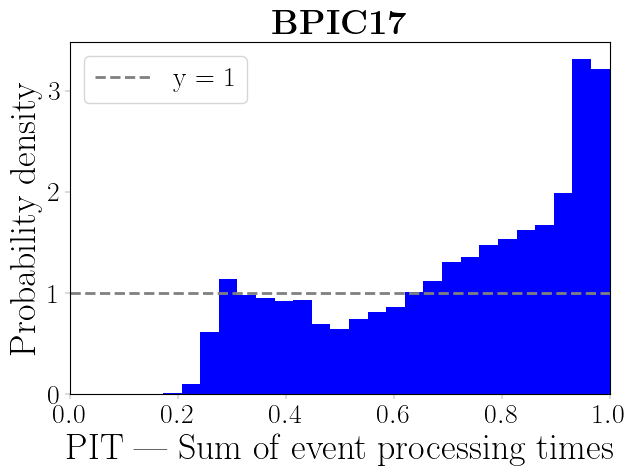

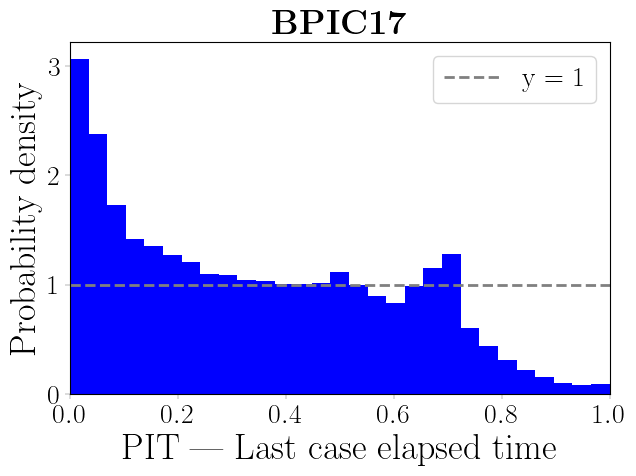

In [5]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

with open('BPIC17_PIT_event_elapsed.pgf', 'wb') as f:
    r = src.evaluation_metrics.plots.plot_pits(res_raw['EventElapsed_PIT'], caption='BPIC17', x_label='Sum of event processing times', pgf=True)
    f.write(r)

with open('BPIC17_PIT_remaining_time.pgf', 'wb') as f:
    r = src.evaluation_metrics.plots.plot_pits(res_raw['RemainingTime_PIT'], caption='BPIC17', x_label='Last case elapsed time', pgf=True)
    f.write(r)

In [6]:
print('Suffix length MAE')
print(np.mean([i['mean'] for i in res_raw['SuffixCountMAE'].values()]))
print('Probabilistic suffix length MAE')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountMAE'].values()]))

print('DLS')
print(np.mean([i['mean'] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))
print('Probabilistic DLS')
print(np.mean([i['prob'][0] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))

print('Mean MAE sum remaining time:')
print(np.mean([i['mean'] for i in res_raw['RemainingTime_SUM_Mean_MAE_outliers'].values()]))
print('Probabilistic MAE sum remaining time:')
print(np.mean([i['prob'][0] for i in res_raw['RemainingTime_SUM_Mean_MAE_outliers'].values()]))

print('Mean MAE last event:')
print(np.mean([i['mean'] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))
print('Probabilistic MAE last event:')
print(np.mean([i['prob'][0] for i in res_raw['RemainingTime_LastEvent_Mean2_Var_seconds_outliers'].values()]))


Suffix length MAE
40.828506592364924
Probabilistic suffix length MAE
11.42071631861661
DLS
0.21108836145632875
Probabilistic DLS
0.3066548170332834
Mean MAE sum remaining time:
10.727267323662307
Probabilistic MAE sum remaining time:
10.623427834376574
Mean MAE last event:
10.751205261845453
Probabilistic MAE last event:
14.401137599488363
